# M4 - D8 Python esercitazione finale

## Analisi dati Covid19
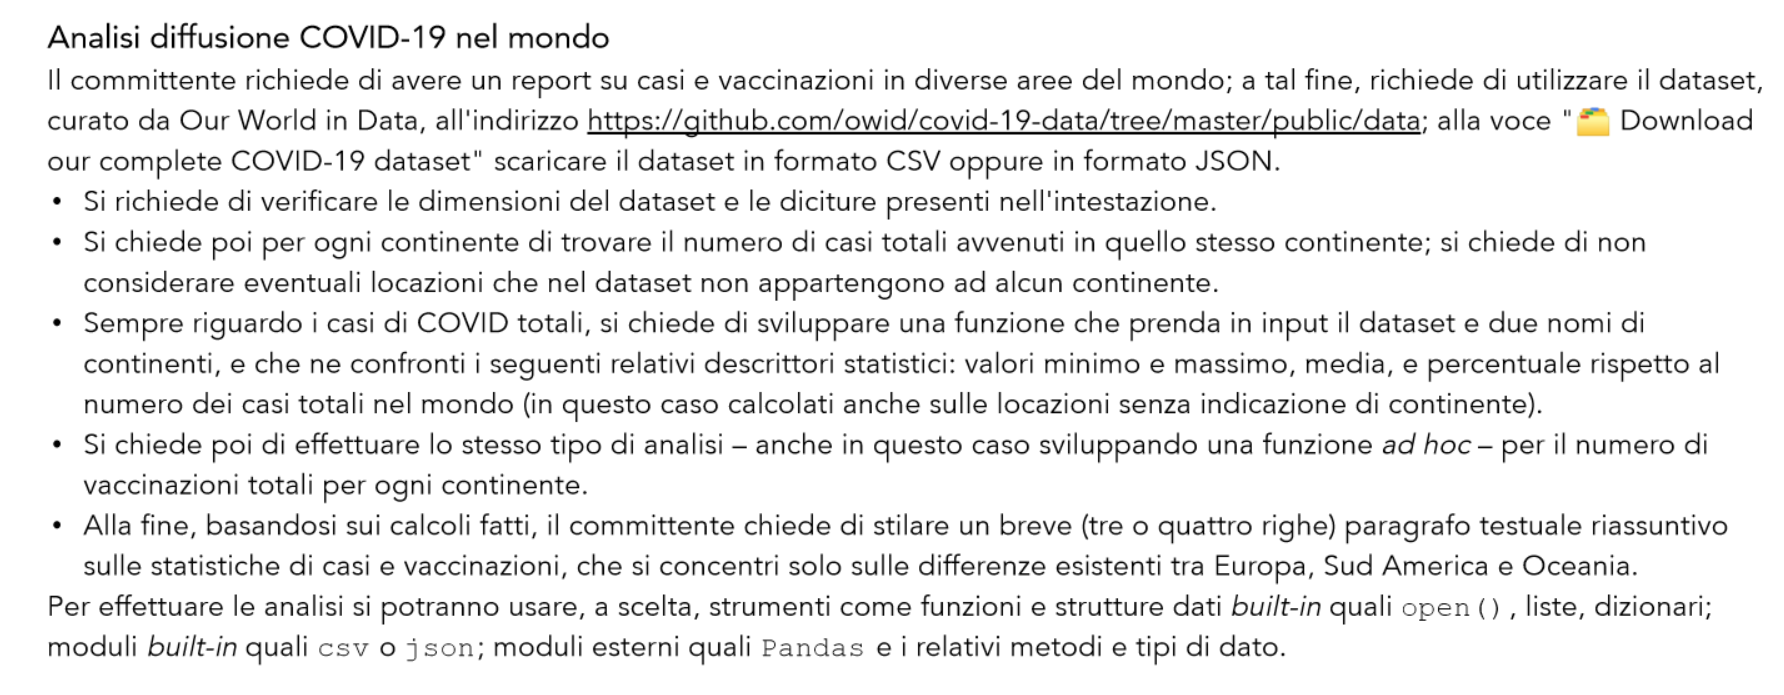

<a id = 'top'><a/>

[0. Analisi esploratoria](#analisi_espl)
    
[1. Analisi dati](#analisi_dati)

[1.1 Casi totali per continente](#casi_cont)

[1.2 Casi totali per continente - funzione](#casi_funz)

[1.3 Vaccini totali per continente - funzione](#vacc_funz)

[2. Analisi](#analisi_testo)

<a id = 'analisi_espl'><a/>
## 0. Analisi esploratoria
[Top](#top)

In [69]:
#pip install geopandas

In [2]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib as plt
import plotly.express as px 

In [3]:
df_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv",
                      low_memory=False)

In [4]:
records, attributes = df_covid.shape
print(f"Il dataframe è composto da {records} records e {attributes} attributi")

Il dataframe è composto da 313070 records e 67 attributi


In [5]:
df_covid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [6]:
df_covid.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.770450e+05  3.043850e+05        3.031210e+05  2.562950e+05   
mean   5.813693e+06  1.067927e+04        1.072212e+04  8.088657e+04   
std    3.625507e+07  1.027196e+05        9.996290e+04  4.176696e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    6.607000e+03  0.000000e+00        1.000000e+00  1.220000e+02   
50%    6.262700e+04  1.600000e+01        3.714300e+01  1.237000e+03   
75%    6.476020e+05  5.160000e+02        6.255710e+02  1.071100e+04   
max    7.668943e+08  7.460817e+06        6.410667e+06  6.935876e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  304452.000000        303222.000000            277045.000000   
mean       95.248095            95.620153             88706.356997   
std       599.057676           589.712617            139152.234105   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000              2064.875000   
50%         0.000000             0.286000             21311.962000   
75%         6.000000             6.571000            109074.288000   
max     20027.000000         14677.857000            737554.506000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          304385.000000                   303121.000000   
mean              161.112543                      161.754190   
std              1124.207073                      632.916278   
min                 0.000000                        0.000000   
25%                 0.000000                        0.233000   
50%                 2.330000                       10.488000   
75%                67.743000                      102.289000   
max            228872.025000                    37241.781000   

       total_deaths_per_million  ...   male_smokers  handwashing_facilities  \
count             256295.000000  ...  179514.000000           118850.000000   
mean                 814.345879  ...      32.909710               50.789467   
std                 1056.182215  ...      13.574656               31.957320   
min                    0.000000  ...       7.700000                1.188000   
25%                   51.069000  ...      22.600000               20.859000   
50%                  339.847000  ...      33.100000               49.839000   
75%                 1248.151000  ...      41.300000               83.241000   
max                 6477.641000  ...      78.100000              100.000000   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
count               214178.000000    287944.000000            235192.000000   
mean                     3.097013        73.717136                 0.722471   
std                      2.548374         7.397232                 0.148990   
min                      0.100000        53.280000                 0.394000   
25%                      1.300000        69.590000                 0.602000   
50%                      2.500000        75.050000                 0.740000   
75%                      4.200000        79.460000                 0.829000   
max                     13.800000        86.750000                 0.957000   

         population  excess_mortality_cumulative_absolute  \
count  3.130700e+05                          1.066900e+04   
mean   1.280650e+08                          4.739668e+04   
std    6.595131e+08                          1.384241e+05   
min    4.700000e+01                         -3.772610e+04   
25%    4.490020e+05                          2.780000e+01   
50%    5.882259e+06                          4.530999e+03   
75%    2.830170e+07                          3.159700e+04   
max    7.975105e+09                          1.282260e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 10669.000000      10669.000000   
mean                      9.538903         12.633550   
std               

In [7]:
df_covid_cases = df_covid[["continent", "location", "date", "total_cases", "new_cases"]]
df_covid_cases

continent     location        date  total_cases  new_cases
0           Asia  Afghanistan  2020-01-03          NaN        0.0
1           Asia  Afghanistan  2020-01-04          NaN        0.0
2           Asia  Afghanistan  2020-01-05          NaN        0.0
3           Asia  Afghanistan  2020-01-06          NaN        0.0
4           Asia  Afghanistan  2020-01-07          NaN        0.0
...          ...          ...         ...          ...        ...
313065    Africa     Zimbabwe  2023-05-20     264848.0        0.0
313066    Africa     Zimbabwe  2023-05-21     264848.0        0.0
313067    Africa     Zimbabwe  2023-05-22     264848.0        0.0
313068    Africa     Zimbabwe  2023-05-23     264848.0        0.0
313069    Africa     Zimbabwe  2023-05-24     264848.0        0.0

[313070 rows x 5 columns]

In [8]:
continent_list_n = list(set(df_covid["continent"]))
continent_list = []
for i in continent_list_n:
    if str(i) != "nan":
        continent_list.append(str(i))
continent_list

['Europe', 'Oceania', 'North America', 'South America', 'Africa', 'Asia']

In [9]:
location_list_n = list(set(df_covid["location"]))
for i in continent_list:
    print(i in location_list_n)

True
True
True
True
True
True


L'attributo "total_cases" fa riferimento ai casi totali, cumulativi dall'inizio della pandemia. Per questo motivo per poter ottenre il totale dei casi per ogni continente, si dovranno utilizzare i dati della colonna "new_cases", che rappresentano i nuovi casi tracciati ogni giorno (non cumulandoli).

Tra i continenti sono inclusi anche record caratterizzati da continenti NaN. Questi corrispondono a record, il cui valor "location" risulta essere un continente invece che una nazione, e di conseguenza i dati relativi ai casi e vaccini sono i dati sommati dall'inizio della pandemia. Per questo motivo per poter ottenere dati realistici, i record con "continent" == NaN verranno esclusi dalla dataframe.

<a id = 'analisi_dati'><a/>
## 1. Analisi dati

<a id = 'casi_cont'><a/>
### 1.1 Casi totali per continente
[Top](#top)

In [10]:
condizione_nan = (df_covid["continent"].notna())
df_covid_cont = df_covid[condizione_nan]

df_covid_cont_cases = df_covid_cont.groupby("continent")[["new_cases", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                            "new_cases":"Total cases",
                                                                                                                            "population":"Population"})
df_covid_cont_cases.sort_values("Total cases", ascending = False, inplace = True)
df_covid_cont_cases

In [13]:
cont_cases = requests.get("https://gist.githubusercontent.com/hrbrmstr/91ea5cc9474286c72838/raw/59421ff9b268ff0929b051ddafafbeb94a4c1910/continents.json")

gdf_cases = gpd.GeoDataFrame.from_features(cont_cases.json())

cond_cases = (gdf_cases["CONTINENT"] == "Asia")  | (gdf_cases["CONTINENT"] == "North America") | (gdf_cases["CONTINENT"] == "Europe") | (gdf_cases["CONTINENT"] == "Africa") | (gdf_cases["CONTINENT"] == "South America") | (gdf_cases["CONTINENT"] == "Oceania")

gdf_cases = gdf_cases[cond_cases]
gdf_cases.sort_values("CONTINENT", inplace = True)
gdf_cases.rename(columns = {"CONTINENT":"Continent"}, inplace = True)
#gdf_cases

In [14]:
gdf_cases = pd.merge(gdf_cases, df_covid_cont_cases, on = "Continent")
gdf_cases.set_index("Continent", inplace = True)
#gdf_cases

In [15]:
map_cases = px.choropleth_mapbox(gdf_cases,
                                 geojson = gdf_cases.geometry,
                                 locations = gdf_cases.index,
                                 color = "Total cases",
                                 mapbox_style = "carto-positron",
                                 color_continuous_scale = "Reds",
                                 opacity=0.5,
                                 zoom=1,
).update_layout(margin={"l": 0, "r": 0, "b": 0, "t": 0})

In [39]:
df_covid_cont_cases_tests = df_covid_cont.groupby("continent")[["new_cases", "new_tests", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                                              "new_cases":"Total cases",
                                                                                                                                              "new_tests":"Total tests",
                                                                                                                                              "population":"Population"})
df_covid_cont_cases_tests.sort_values("Total cases", ascending = False, inplace = True)
df_covid_cont_cases_tests

Continent  Total cases   Total tests    Population
1           Asia  297460760.0  1.798337e+09  5.843923e+12
2         Europe  249444178.0  1.954534e+09  1.002753e+12
3  North America  124187478.0  1.017159e+09  7.434557e+11
5  South America   68612891.0  1.635488e+08  5.408701e+11
4        Oceania   14123192.0  7.840947e+07  5.575817e+10
0         Africa   13089145.0  6.153282e+07  1.765587e+12

In [18]:
tot_world_cases = df_covid_cont_cases["Total cases"].sum()
print(f"Il numero di casi totali nel mondo ammonta a {int(tot_world_cases)}.")

Il numero di casi totali nel mondo ammonta a 766917644.


Il continente col maggior numero di casi è l'Asia (297,234,406 casi) seguito da Europa (249,319,188) e Nord America (12,417,556). L'Africa presenta il minor numero di casi Covdi19 (13,088,991), nonostante presenti una popolazione simile all'Asia. Questo potrebbe essere riconducibile ad un numero inferiore di test effettuati e/o riportati, che in effetti sono di due ordini di grandezza inferiori a quelli effettuati in Asia, e lo stesso ordine di grandezza dei test effettuati in Oceania, che peró presenta una popolazione minore di due ordini di grandezza dell'Africa.

<a id = 'casi_funz'><a/>
### 1.2 Casi totali per continente - funzione
[Top](#top)

In [19]:
def case_continent(df, continente1, continente2):
    
    if df["continent"].isnull().values.any():
        
        # Esclusione dei "continetn" == "NaN"
        condizione_nan = df["continent"].notna()
        df = df[condizione_nan]
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        df_cont = df[condizione_cont]
        
        # Min max mean
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (min)":[min_loc1, min_loc2]})
        
        df_min = df_cont.groupby("continent")["total_cases"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Minum value"})
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (max)":[max_loc1, max_loc2]})
        
        df_max = df_cont.groupby("continent")["total_cases"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_cases"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                     "total_cases":"Mean value"})
        # Percentuali
        df_covid_cont_cases = df.groupby("continent")["new_cases"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                         "new_cases":"Total cases"})
        
        cases_cont1 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente1, "Total cases"].iloc[0]
        cases_cont2 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente2, "Total cases"].iloc[0]
        
        world_cases = df_covid_cont_cases["Total cases"].sum()
        
        perc_cont1 = round(((cases_cont1 / world_cases) * 100), 2)
        perc_cont2 = round(((cases_cont2 / world_cases) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of caseson world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_min_loc, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
        
    elif df["continent"].notna().values.all():
        df_covid_cont_cases = df.groupby("continent")["new_cases"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                         "new_cases":"Total cases"})
        
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        
        df_cont = df[condizione_cont]
        
        # Min max mean
        df_min = df_cont.groupby("continent")["total_cases"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Minum value"})
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (min)":[min_loc1, min_loc2]})
        
        df_min = df_cont.groupby("continent")["total_cases"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Minum value"})
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (max)":[max_loc1, max_loc2]})
        
        df_max = df_cont.groupby("continent")["total_cases"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_cases"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                     "total_cases":"Mean value"})
        # Percentuali
        cases_cont1 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente1, "Total cases"].iloc[0]
        cases_cont2 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente2, "Total cases"].iloc[0]
        
        world_cases = df_covid_cont_cases["Total cases"].sum()
        
        perc_cont1 = round(((cases_cont1 / world_cases) * 100), 2)
        perc_cont2 = round(((cases_cont2 / world_cases) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of cases on world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_min_loc, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
    
    return df_merged

In [20]:
case_continent(df_covid, "Asia", "Oceania")

Continent    Nation (min)  Minum value Nation (max)  Maximum value  \
0      Asia     Afghanistan          1.0        China     99261812.0   
1   Oceania  American Samoa          1.0    Australia     11339196.0   

     Mean value  Percentage of caseson world total  
0  2.280848e+06                              38.79  
1  2.752166e+05                               1.84

In [21]:
def case_three_continent(df, continente1, continente2, continente3):
    
    if df["continent"].isnull().values.any():
        
        # Esclusione dei "continetn" == "NaN"
        condizione_nan = df["continent"].notna()
        df = df[condizione_nan]
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2) | (df["continent"] == continente3)
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")[["new_cases", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                 "new_cases":"Total cases",
                                                                                                                 "population":"Population"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmin()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        min_loc3 = df_cont3.loc[df_cont3["total_cases"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (min)":[min_loc1, min_loc2, min_loc3]})
        
        df_min = df_cont.groupby("continent")["total_cases"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Minum value"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmax()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        max_loc3 = df_cont3.loc[df_cont3["total_cases"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (max)":[max_loc1, max_loc2, max_loc3]})
        
        df_max = df_cont.groupby("continent")["total_cases"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_cases"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                     "total_cases":"Mean value"})
        # Percentuali
        df_covid_cont_cases = df.groupby("continent")["new_cases"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                         "new_cases":"Total cases"})
        
        cases_cont1 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente1, "Total cases"].iloc[0]
        cases_cont2 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente2, "Total cases"].iloc[0]
        cases_cont3 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente3, "Total cases"].iloc[0]
        
        world_cases = df_covid_cont_cases["Total cases"].sum()
        
        perc_cont1 = round(((cases_cont1 / world_cases) * 100), 2)
        perc_cont2 = round(((cases_cont2 / world_cases) * 100), 2)
        perc_cont3 = round(((cases_cont3 / world_cases) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2, continente3],
                                "Percentage of cases on world total":[perc_cont1, perc_cont2, perc_cont3]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent").sort_values("Total cases", ascending = False)
        
    elif df["continent"].notna().values.all():
        df_covid_cont_cases = df.groupby("continent")["new_cases"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                         "new_cases":"Total cases"})
        
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2) | (df["continent"] == continente3)
        
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")[["new_cases", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                 "new_cases":"Total cases",
                                                                                                                 "population":"Population"})
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmin()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        min_loc3 = df_cont3.loc[df_cont3["total_cases"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (min)":[min_loc1, min_loc2, min_loc3]})
        
        df_min = df_cont.groupby("continent")["total_cases"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Minum value"})
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_cases"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_cases"].idxmax()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        max_loc3 = df_cont3.loc[df_cont3["total_cases"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (max)":[max_loc1, max_loc2, max_loc3]})
        
        df_max = df_cont.groupby("continent")["total_cases"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_cases"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                     "total_cases":"Mean value"})
        # Percentuali
        cases_cont1 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente1, "Total cases"].iloc[0]
        cases_cont2 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente2, "Total cases"].iloc[0]
        cases_cont3 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente3, "Total cases"].iloc[0]
        
        world_cases = df_covid_cont_cases["Total cases"].sum()
        
        perc_cont1 = round(((cases_cont1 / world_cases) * 100), 2)
        perc_cont2 = round(((cases_cont2 / world_cases) * 100), 2)
        perc_cont3 = round(((cases_cont3 / world_cases) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2, continente3],
                                "Percentage of cases on world total":[perc_cont1, perc_cont2, perc_cont3]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent").sort_values("Total cases", ascending = False)
    
    return df_merged

<a id = 'vacc_funz'><a/>
### 1.3 Vaccini totali per continente - funzione
[Top](#top)

In [22]:
def vacc_continent(df, continente1, continente2):
    
    if df["continent"].isnull().values.any():
        
        # Esclusione dei "continetn" == "NaN"
        condizione_nan = df["continent"].notna()
        df = df[condizione_nan]
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                        "new_vaccinations":"Total vaccinations"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (min)":[min_loc1, min_loc2]})
        
        df_min = df_cont.groupby("continent")["total_vaccinations"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Minum value"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (max)":[max_loc1, max_loc2]})
        
        df_max = df_cont.groupby("continent")["total_vaccinations"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Maximum value"})
        
        df_mean = df_cont.groupby("continent")["total_vaccinations"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                            "total_vaccinations":"Mean value"})
        
        # Percentuale
        df_covid_cont_vacc = df.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                               "new_vaccinations":"Total vaccinations"})
        
        vacc_cont1 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente1, "Total vaccinations"].iloc[0]
        vacc_cont2 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente2, "Total vaccinations"].iloc[0]
        
        world_vacc = df_covid_cont_vacc["Total vaccinations"].sum()
        
        perc_cont1 = round(((vacc_cont1 / world_vacc) * 100), 2)
        perc_cont2 = round(((vacc_cont2 / world_vacc) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of vaccinations on world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
        
    elif df["continent"].notna().values.all():
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                        "new_vaccinations":"Total vaccinations"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (min)":[min_loc1, min_loc2]})
        
        df_min = df_cont.groupby("continent")["total_vaccinations"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Minum value"})
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2], 
                                   "Nation (max)":[max_loc1, max_loc2]})
        
        df_max = df_cont.groupby("continent")["total_vaccinations"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_vaccinations"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                            "total_vaccinations":"Mean value"})
        
        # Percentuali
        df_covid_cont_vacc = df.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                               "new_vaccinations":"Total cases"})
        vacc_cont1 = df_covid_cont_vacc.loc[df_covid_cont_vacc["Continent"] == continente1, "Total vaccinations"].iloc[0]
        vacc_cont2 = df_covid_cont_vacc.loc[df_covid_cont_vacc["Continent"] == continente2, "Total vaccinations"].iloc[0]
        
        world_vacc = df_covid_cont_vacc["Total vaccinations"].sum()
        
        perc_cont1 = round(((vacc_cont1 / world_vacc) * 100), 2)
        perc_cont2 = round(((vacc_cont2 / world_vacc) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of vaccinations on world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
    
    return df_merged

In [23]:
vacc_continent(df_covid, "Asia", "Oceania")

Continent  Total vaccinations Nation (min)  Minum value Nation (max)  \
0      Asia        7.547852e+09  Afghanistan          0.0        China   
1   Oceania        7.454216e+07         Fiji          0.0    Australia   

   Maximum value    Mean value  Percentage of vaccinations on world total  
0   3.491077e+09  2.083620e+08                                      69.59  
1   6.549236e+07  1.248364e+07                                       0.69

In [24]:
def vacc_three_continent(df, continente1, continente2, continente3):
    
    if df["continent"].isnull().values.any():
        
        # Esclusione dei "continetn" == "NaN"
        condizione_nan = df["continent"].notna()
        df = df[condizione_nan]
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2) | (df["continent"] == continente3)
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")[["new_vaccinations", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                        "new_vaccinations":"Total vaccinations",
                                                                                                                        "population":"Population"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmin()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        min_loc3 = df_cont3.loc[df_cont3["total_vaccinations"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (min)":[min_loc1, min_loc2, min_loc3]})
        
        df_min = df_cont.groupby("continent")["total_vaccinations"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Minimum value"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmax()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        max_loc3 = df_cont3.loc[df_cont3["total_vaccinations"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (max)":[max_loc1, max_loc2, max_loc3]})
        
        df_max = df_cont.groupby("continent")["total_vaccinations"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Maximum value"})
        
        df_mean = df_cont.groupby("continent")["total_vaccinations"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                            "total_vaccinations":"Mean value"})
        
        # Percentuale
        df_covid_cont_vacc = df.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                               "new_vaccinations":"Total vaccinations"})
        
        vacc_cont1 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente1, "Total vaccinations"].iloc[0]
        vacc_cont2 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente2, "Total vaccinations"].iloc[0]
        vacc_cont3 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente3, "Total vaccinations"].iloc[0]
        
        world_vacc = df_covid_cont_vacc["Total vaccinations"].sum()
        
        perc_cont1 = round(((vacc_cont1 / world_vacc) * 100), 2)
        perc_cont2 = round(((vacc_cont2 / world_vacc) * 100), 2)
        perc_cont3 = round(((vacc_cont3 / world_vacc) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2, continente3],
                                "Percentage of vaccinations on world total":[perc_cont1, perc_cont2, perc_cont3]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent").sort_values("Total vaccinations", ascending = False)
        
    elif df["continent"].notna().values.all():
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2) | (df["continent"] == continente3)
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")[["new_vaccinations", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                        "population":"Population",
                                                                                                                        "new_vaccinations":"Total vaccinations"})
        
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        min_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmin()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        min_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmin()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        min_loc3 = df_cont3.loc[df_cont3["total_vaccinations"].idxmin()]["location"]
        df_min_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (min)":[min_loc1, min_loc2, min_loc3]})
        
        df_min = df_cont.groupby("continent")["total_vaccinations"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Minum value"})
        df_cont1 = df_cont[df_cont["continent"] == continente1]
        max_loc1 = df_cont1.loc[df_cont1["total_vaccinations"].idxmax()]["location"]
        df_cont2 = df_cont[df_cont["continent"] == continente2]
        max_loc2 = df_cont2.loc[df_cont2["total_vaccinations"].idxmax()]["location"]
        df_cont3 = df_cont[df_cont["continent"] == continente3]
        max_loc3 = df_cont3.loc[df_cont3["total_vaccinations"].idxmax()]["location"]
        df_max_loc = pd.DataFrame({"Continent": [continente1, continente2, continente3], 
                                   "Nation (max)":[max_loc1, max_loc2, max_loc3]})
        
        df_max = df_cont.groupby("continent")["total_vaccinations"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_vaccinations"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                            "total_vaccinations":"Mean value"})
        
        # Percentuali
        df_covid_cont_vacc = df.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                               "new_vaccinations":"Total cases"})
        vacc_cont1 = df_covid_cont_vacc.loc[df_covid_cont_vacc["Continent"] == continente1, "Total vaccinations"].iloc[0]
        vacc_cont2 = df_covid_cont_vacc.loc[df_covid_cont_vacc["Continent"] == continente2, "Total vaccinations"].iloc[0]
        vacc_cont3 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente3, "Total vaccinations"].iloc[0]
        
        world_vacc = df_covid_cont_vacc["Total vaccinations"].sum()
        
        perc_cont1 = round(((vacc_cont1 / world_vacc) * 100), 2)
        perc_cont2 = round(((vacc_cont2 / world_vacc) * 100), 2)
        perc_cont3 = round(((vacc_cont3 / world_vacc) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2, continente3],
                                "Percentage of vaccinations on world total":[perc_cont1, perc_cont2, perc_cont3]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max_loc, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent").sort_values("Total vaccinations", ascending = False)
    
    return df_merged

In [25]:
condizione_nan = (df_covid["continent"].notna())
df_covid_cont = df_covid[condizione_nan]

df_covid_cont_vacc = df_covid_cont.groupby("continent")[["new_vaccinations", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                                  "new_vaccinations":"Total vaccinations",
                                                                                                                                  "population":"Population"})
df_covid_cont_vacc.sort_values("Total vaccinations", ascending = False, inplace = True)
df_covid_cont_vacc

Continent  Total vaccinations    Population
1           Asia        7.547852e+09  5.843923e+12
2         Europe        1.265399e+09  1.002753e+12
3  North America        9.975372e+08  7.434557e+11
5  South America        8.431843e+08  5.408701e+11
0         Africa        1.173671e+08  1.765587e+12
4        Oceania        7.454216e+07  5.575817e+10

Il maggior numero di vaccinazioni eseguite rispecchia la gradutoria dei casi totali per continente, tranne per l'Africa che ha effettuato piú vaccini rispetto all'Oceania (Africa con peró meno casi riportati).

In [29]:
cont_vacc = requests.get("https://gist.githubusercontent.com/hrbrmstr/91ea5cc9474286c72838/raw/59421ff9b268ff0929b051ddafafbeb94a4c1910/continents.json")

gdf_vacc = gpd.GeoDataFrame.from_features(cont_vacc.json())

cond_vacc = (gdf_vacc["CONTINENT"] == "Asia")  | (gdf_vacc["CONTINENT"] == "North America") | (gdf_vacc["CONTINENT"] == "Europe") | (gdf_vacc["CONTINENT"] == "Africa") | (gdf_vacc["CONTINENT"] == "South America") | (gdf_vacc["CONTINENT"] == "Oceania")

gdf_vacc = gdf_vacc[cond_vacc]
gdf_vacc.sort_values("CONTINENT", inplace = True)
gdf_vacc.rename(columns = {"CONTINENT":"Continent"}, inplace = True)
#gdf_vacc

In [30]:
gdf_vacc = pd.merge(gdf_vacc, df_covid_cont_vacc, on = "Continent")
gdf_vacc.set_index("Continent", inplace = True)
#gdf_vacc

In [31]:
map_vacc = px.choropleth_mapbox(gdf_vacc,
                                geojson = gdf_vacc.geometry,
                                locations = gdf_vacc.index,
                                color = "Total vaccinations",
                                mapbox_style = "carto-positron",
                                color_continuous_scale = "Greens",
                                opacity=0.5,
                                zoom=1,
).update_layout(margin={"l": 0, "r": 0, "b": 0, "t": 0})

<a id = 'analisi_testo'><a/>
## 2. Analisi
[Top](#top)

Il numero di casi totali nel mondo ammonta a 766917644.

Da un confronto generale del numero di casi a vaccini totali tra i continenti, il continente col maggior numero di casi è l'Asia (297,234,406 casi) seguito da Europa (249,319,188) e Nord America (12,417,556). L'Africa presenta il minor numero di casi Covdi19 (13,088,991), nonostante presenti una popolazione simile all'Asia. Questo potrebbe essere riconducibile ad un numero inferiore di test effettuati e/o riportati, che in effetti sono di due ordini di grandezza inferiori a quelli effettuati in Asia, e lo stesso ordine di grandezza dei test effettuati in Oceania, che peró presenta una popolazione minore di due ordini di grandezza dell'Africa.

In [40]:
df_covid_cont_cases_tests

Continent  Total cases   Total tests    Population
1           Asia  297460760.0  1.798337e+09  5.843923e+12
2         Europe  249444178.0  1.954534e+09  1.002753e+12
3  North America  124187478.0  1.017159e+09  7.434557e+11
5  South America   68612891.0  1.635488e+08  5.408701e+11
4        Oceania   14123192.0  7.840947e+07  5.575817e+10
0         Africa   13089145.0  6.153282e+07  1.765587e+12

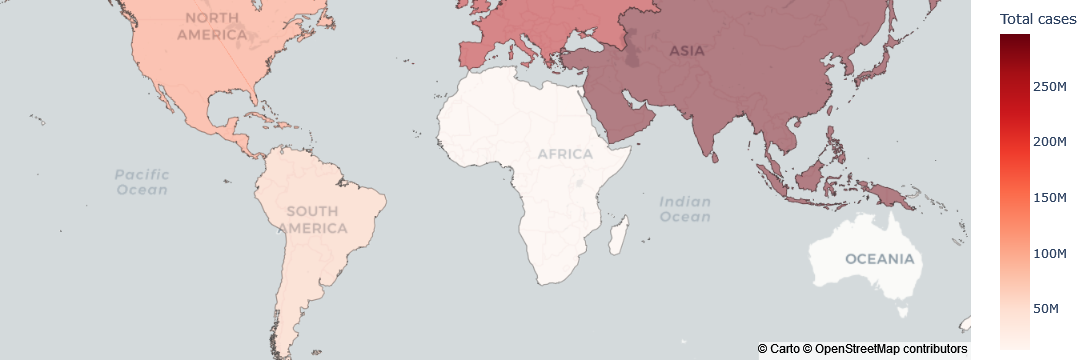

In [33]:
map_cases

Per quanto riguarda i vaccini, il maggior numero di vaccinazioni eseguite rispecchia la gradutoria dei casi totali per continente, tranne per l'Africa che ha effettuato piú vaccini rispetto all'Oceania (Africa con peró meno casi riportati).

In [34]:
df_covid_cont_vacc

Continent  Total vaccinations    Population
1           Asia        7.547852e+09  5.843923e+12
2         Europe        1.265399e+09  1.002753e+12
3  North America        9.975372e+08  7.434557e+11
5  South America        8.431843e+08  5.408701e+11
0         Africa        1.173671e+08  1.765587e+12
4        Oceania        7.454216e+07  5.575817e+10

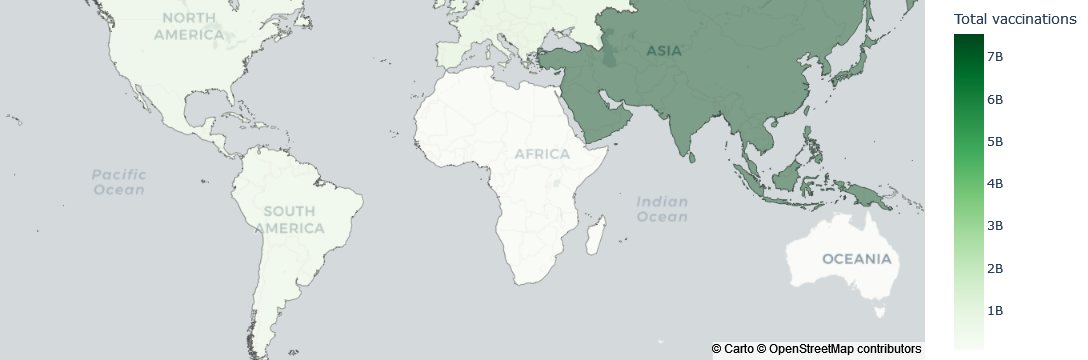

In [35]:
map_vacc

In [36]:
case_three_continent(df_covid, "Europe", "South America", "Oceania")

Continent  Total cases    Population    Nation (min)  Minum value  \
0         Europe  249444178.0  1.002753e+12         Andorra          1.0   
2  South America   68612891.0  5.408701e+11          Brazil          1.0   
1        Oceania   14123192.0  5.575817e+10  American Samoa          1.0   

  Nation (max)  Maximum value    Mean value  \
0       France     39010097.0  2.112151e+06   
2       Brazil     37553337.0  2.659184e+06   
1    Australia     11339196.0  2.752166e+05   

   Percentage of cases on world total  
0                               32.53  
2                                8.95  
1                                1.84

In [37]:
vacc_three_continent(df_covid, "Europe", "South America", "Oceania")

Continent  Total vaccinations    Population      Nation (min)  \
0         Europe        1.265399e+09  1.002753e+12           Albania   
2  South America        8.431843e+08  5.408701e+11  Falkland Islands   
1        Oceania        7.454216e+07  5.575817e+10              Fiji   

   Minimum value Nation (max)  Maximum value    Mean value  \
0            0.0      Germany    192221468.0  2.688857e+07   
2            0.0       Brazil    486436436.0  6.228175e+07   
1            0.0    Australia     65492360.0  1.248364e+07   

   Percentage of vaccinations on world total  
0                                      11.67  
2                                       7.77  
1                                       0.69

Confrontando i tre continenti Europa, Sud America e Oceania, quello col maggior numero di casi totali dall'inizio della pandemia ad oggi è l'Europa, con 249,444,178 casi, il ~33% rispetto ai casi totali mondiali. Il numero di casi rispecchia anche la popolazione: sono stati registrati piú casi in Europa con la maggiore popolazione, seguita dal Sud America, avendo un numero inferiore di popolazione e infince dall'Oceania, col minor numero di persone e di casi.

In tutti e tre i continenti, è stato registrato almeno un caso di covid19.

Tra questi tre continenti, il valore massimo di casi registrati in uno singolo stato, è stato registrato nel continente Europeo, in Francia, 39,010,097 casi.

Similmente, il continente col maggior numero di dosi di vaccino somministrate è l'Europe, seguita da Sud America e poi Oceania. Tuttavia, tra questi continenti selezionati, la nazione col maggior numero di vaccini eseguiti è il Brasile nel continente Sud America. Il valore minimo 0 si riferisce ai giorni in cui i vaccini non erano ancora presenti, quindi valore 0.